draw Duke D as graph8

In [2]:
image_path = "IronDukeD.png"

In [ ]:
from PIL import Image
import numpy as np

# Load image using PIL
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert image to NumPy array
image_array = np.array(image)

# Binarize the image (set a threshold to detect edges)
threshold = 128
binary_image_raw = image_array < threshold  # Convert to boolean array
# Load the image

In [9]:
# np.savetxt("binary_image.txt", binary_image, fmt="%d")

In [14]:
# Get the shape of the image
height, width = binary_image_raw.shape

# Define grid spacing (adjustable for different resolutions)
grid_spacing = 10  # Sample every 10 pixels

import networkx as nx

# Create a graph
G_net = nx.Graph()

# Iterate over the image and sample nodes within the black region (0 values)
for y in range(0, height, grid_spacing):
    for x in range(0, width, grid_spacing):
        if binary_image[y, x] == 1:  # Black region
            G_net.add_node((x, y))

# Connect nodes in a grid pattern
for (x, y) in G_net.nodes:
    if (x + grid_spacing, y) in G_net.nodes:
        G_net.add_edge((x, y), (x + grid_spacing, y))  # Horizontal connection
    if (x, y + grid_spacing) in G_net.nodes:
        G_net.add_edge((x, y), (x, y + grid_spacing))  # Vertical connection

In [ ]:
import matplotlib.pyplot as plt

# Plot the graph
plt.figure(figsize=(8, 8))
nx.draw(G_net, pos={node: node for node in G_net.nodes}, node_size=5, edge_color="blue", with_labels=False)
plt.title("Structured NetworkX Graph of the Duke 'D' Logo")
plt.show()

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from skimage import measure
from scipy.spatial import distance
import random

with open('binary_image.txt', 'r') as file:
    # Step 2: Read each line and split by spaces to create a list of lists
    data = [list(map(int, line.split())) for line in file]

# Step 3: Convert the list into a NumPy array
binary_image = np.array(data)

# Step 2: Extract border points using edge detection (e.g., skimage.measure)
contours = measure.find_contours(binary_image, level=0.5)

# Get inner and outer contours
inner_border = contours[0]  # Assuming there is only one object
outer_border = contours[-1]

In [ ]:
inner_border

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Step 1: Find contours (outer and inner borders)
contours = measure.find_contours(binary_image, 0.5)  # The threshold of 0.5 detects the contour edges

# Step 2: Plotting
fig, ax = plt.subplots()

# Loop through each contour and plot it
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)  # Plot each contour as a red line

# Set up the visualization
ax.set_title("Inner and Outer Borders")
ax.set_aspect('equal')
plt.gca().invert_yaxis()  # Invert Y axis for correct orientation
plt.show()


In [195]:
duke = [
    (0,0),
    (70,110),
    (70,370),
    (0,480),
    (290,480),
    (450,480),
    (530,370),
    (530,110),
    (450,0),
    (290,0),
    (350,110),
    (350,370),
    (240,370),
    (240,110),
    (140,0)
]

In [196]:
len(duke)

15

In [197]:
G = nx.Graph()
G.add_nodes_from(range(len(duke)))

In [198]:
G.add_edges_from(
    [(x,x+1) for x in range(9)] + [
        (9,0),
        (14,13),
        (13,1),
        (1,12),
        (12,2),
        (2,4),
        (4,6),
        (6,11),
        (11,7),
        (7,10),
        (10,8)
    ] + [
        (9,13),
        (13,12),
        (12,4),
        (4,11),
        (11,10),
        (10,9)
    ]
)

In [199]:
pos = dict(zip(range(len(duke)),duke))

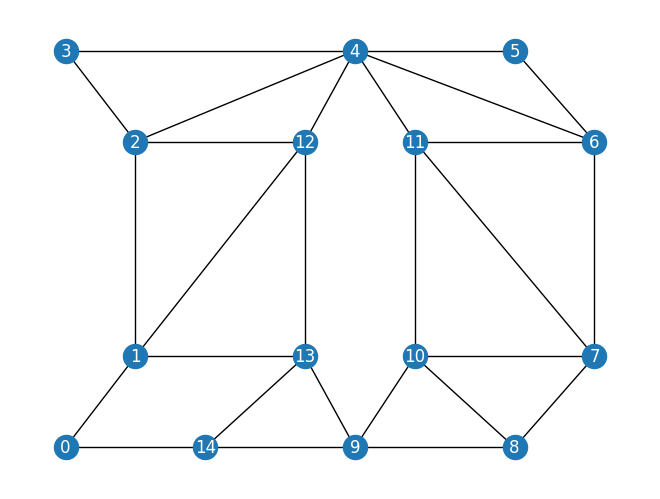

In [203]:
nx.draw(G, pos=pos, with_labels=True, font_color="white")
plt.show()

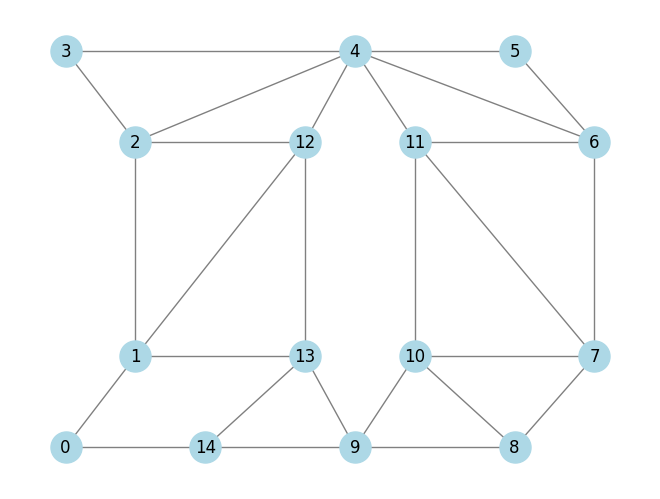

In [200]:
# Draw the graph with specified node positions
nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=12)

# Show the plot
plt.show()

In [193]:
x = []
y = []
for _,__ in duke:
    x.append(_)
    y.append(__)

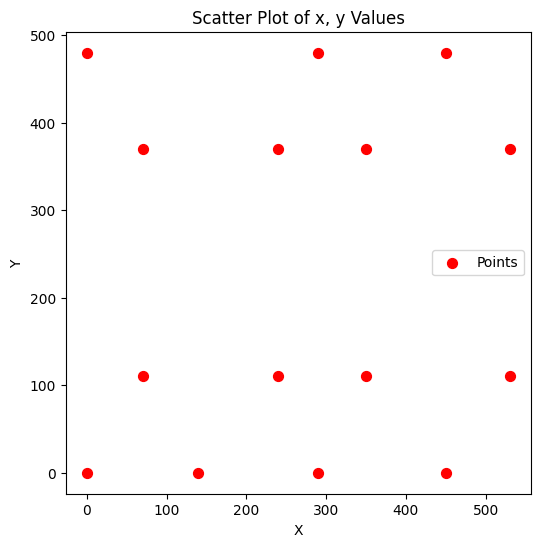

In [194]:
# Step 1: Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='red', s=50, label='Points')  # 's' controls the size of the points

# Step 2: Customize plot
plt.title("Scatter Plot of x, y Values")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Show the plot
plt.show()

In [ ]:
new_samples = []

for i in range(len(samples)):
    x = round(samples[i][0])
    y = round(samples[i][1])
    if binary_image[x, y] == 1: 
        new_samples.append(None)

In [ ]:
# Plotting
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], color='red', s=10, label='Sampled Points')
ax.set_title(f"Poisson Disk Sampling in {width}x{height} Box")
ax.set_aspect('equal')
plt.xlim(0, width)
plt.ylim(0, height)
plt.gca().invert_yaxis()
plt.legend()
plt.show()
